In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [1]:
filename = '2017-02-23.Hotels.json'
data = pd.read_json(filename)
filename2 = '2017-03-23.Hotels.json'
data2 = pd.read_json(filename2)

NameError: name 'pd' is not defined

In [3]:
# Clean up location data to ensure consistency
data['Hotelcity'] = data['Hotelcity'].str.replace('North','')
data['Hotelcity'] = data['Hotelcity'].str.replace('Henderson','Las Vegas')
data['Hotelcity'] = data['Hotelcity'].str.replace('Boulder City','Las Vegas')
data['Hotelcity'] = data['Hotelcity'].str.replace('Boulder City','Las Vegas')
data['Hotelcity'] = data['Hotelcity'].str.replace('Jean','Las Vegas')
data['Hoteladdress'] = data['Hoteladdress'].str.replace('Boulevard','Blvd')
data['Hoteladdress'] = data['Hoteladdress'].str.replace('South','S')
data['Hoteladdress'] = data['Hoteladdress'].str.replace('Highway','Hwy')
data['Hoteladdress'] = data['Hoteladdress'].str.replace('.','')


data2['Hotelcity'] = data2['Hotelcity'].str.replace('North','')
data2['Hotelcity'] = data2['Hotelcity'].str.replace('Henderson','Las Vegas')
data2['Hotelcity'] = data2['Hotelcity'].str.replace('Boulder City','Las Vegas')
data2['Hotelcity'] = data2['Hotelcity'].str.replace('Jean','Las Vegas')
data2['Hoteladdress'] = data2['Hoteladdress'].str.replace('Boulevard','Blvd')
data2['Hoteladdress'] = data2['Hoteladdress'].str.replace('South','S')
data2['Hoteladdress'] = data2['Hoteladdress'].str.replace('Highway','Hwy')
data2['Hoteladdress'] = data2['Hoteladdress'].str.replace('.','')

In [4]:
#set(data.Location)
#set(data2.Location)

In [5]:
# Eliminate string characters from numeric data
data['Hotelprice'] = data['Hotelprice'].str.replace('$','')
data['Hotelprice'] = data['Hotelprice'].str.replace('none','0')
data['Hotelprice'] = data['Hotelprice'].str.split().str[0]
data['Hotelprice'] = data['Hotelprice'].str.split('+').str[0]
data['Hotelprice'] = data['Hotelprice'].astype(float)

data2['Hotelprice'] = data2['Hotelprice'].str.replace('$','')
data2['Hotelprice'] = data2['Hotelprice'].str.replace('none','')
data2['Hotelprice'] = data2['Hotelprice'].str.split().str[0]
data2['Hotelprice'] = data2['Hotelprice'].str.split('+').str[0]
data2['Hotelprice'] = data2['Hotelprice'].astype(float)

In [6]:
data['Hotelprice_Discount'] = data['Hotelprice_Discount'].str.replace('$','')
data['Hotelprice_Discount'] = data['Hotelprice_Discount'].str.replace('none','0')
data['Hotelprice_Discount'] = data['Hotelprice_Discount'].str.replace(',','')
data['Hotelprice_Discount'] = data['Hotelprice_Discount'].str.split().str[0]
data['Hotelprice_Discount'] = data['Hotelprice_Discount'].str.split('+').str[0]
data['Hotelprice_Discount'] = data['Hotelprice_Discount'].astype(float)

data2['Hotelprice_Discount'] = data2['Hotelprice_Discount'].str.replace('$','')
data2['Hotelprice_Discount'] = data2['Hotelprice_Discount'].str.replace('none','0')
data2['Hotelprice_Discount'] = data2['Hotelprice_Discount'].str.replace(',','')
data2['Hotelprice_Discount'] = data2['Hotelprice_Discount'].str.split().str[0]
data2['Hotelprice_Discount'] = data2['Hotelprice_Discount'].str.split('+').str[0]
data2['Hotelprice_Discount'] = data2['Hotelprice_Discount'].astype(float)

In [7]:
data['Hotelreviews'] = data['Hotelreviews'].str.replace('reviews','')
data['Hotelreviews'] = data['Hotelreviews'].str.replace(',','')
data['Hotelreviews'] = data['Hotelreviews'].str.replace('none','')
data['Hotelreviews'] = data['Hotelreviews'].str.split().str[0]
data['Hotelreviews'] = data['Hotelreviews'].str.split('+').str[0]
data['Hotelreviews'] = data['Hotelreviews'].astype(float)

data2['Hotelreviews'] = data2['Hotelreviews'].str.replace('reviews','')
data2['Hotelreviews'] = data2['Hotelreviews'].str.replace(',','')
data2['Hotelreviews'] = data2['Hotelreviews'].str.replace('none','')
data2['Hotelreviews'] = data2['Hotelreviews'].str.split().str[0]
data2['Hotelreviews'] = data2['Hotelreviews'].str.split('+').str[0]
data2['Hotelreviews'] = data2['Hotelreviews'].astype(float)

data['HotelRating'] = data['HotelRating'].astype(float)
data2['HotelRating'] = data2['HotelRating'].astype(float)

In [8]:
#set(data.Hotelprice)
#set(data2.Hotelprice)

In [9]:
# Exclude redundant rows
NoDupsData = data.drop_duplicates()
NoDupsData2 = data2.drop_duplicates()

In [10]:
# Create the inner merge of the two dataframes
dataInnerMerge = pd.merge(NoDupsData, NoDupsData2, \
                          on=['HotelRating','Hotelprice','Hotelprice_Discount','Hotelreviews'],\
                          how='inner')

In [11]:
# Determine the set of 'new products'
NoDupsData2['key1'] = 1
dataInnerMerge['key2'] = 1
newHotels = pd.merge(NoDupsData2, dataInnerMerge, \
                      on=['HotelRating','Hotelprice','Hotelprice_Discount','Hotelreviews'],\
                      how = 'left')

# Create the associated dataframe
newHotels = newHotels[newHotels.key2 != newHotels.key1]

# Add the starting date in the dataframe in which the product is first shown

/Users/luis/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [12]:
# Determine the set of 'closed products'
NoDupsData['key1'] = 1
closedHotels = pd.merge(NoDupsData, dataInnerMerge, \
                       on=['HotelRating','Hotelprice','Hotelprice_Discount','Hotelreviews'],\
                      how = 'left')

# Create the associated dataframe
closedHotels  = closedHotels[closedHotels.key2 != closedHotels.key1]

# Add the closing date in the dataframe in which the product is last shown


# Find days on market by comparing the starting date with the closing date

/Users/luis/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [1]:
# Create a histogram of Prices
findHotels = closedHotels.Hotelreviews[closedHotels['Hotelreviews'] > 100.0]
findHotels = findHotels[findHotels < 1000.0]
plt.hist(findHotels)
plt.title("Quality")
plt.xlabel("Hotelreviews")
plt.ylabel("Hotels")
plt.show()





scatterData = {'Hotelreviews': findHotels,\
               'HotelRating' : \
               np.random.randint(0,30,size=len(findHotels))}
sD = pd.DataFrame(scatterData)
# Create a Scatter Diagram of Prices vs Days on Market
fig = plt.figure()
ax = fig.add_subplot(111)
x = sD.Hotelreviews
y = sD.HotelRating
ax.scatter(x,y,color='blue')
ax.set_ylim([0,40])
ax.set_xlim([0,500])

plt.title("Selection")
plt.xlabel("Hotelreviews")
plt.ylabel("Hotels")
plt.show()




# Create a Pie Chart of New, Like New, and Used products
colors = ["#E13F29", "#D69A80", "#D63B59","#A63B59","#B63B59","#C63B79"]
# Create a pie chart
plt.pie(
    [closedHotels.HotelRating[closedHotels.HotelRating == 4.7].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 4.5].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 4.4].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 4.3].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 4.2].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 4.1].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 4.0].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 3.9].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 3.8].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 3.7].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 3.5].count(),\
     closedHotels.HotelRating[closedHotels.HotelRating == 2.8].count()],
    labels= ['4.7','4.5','4.4','4.3','4.2','4.1','4.0','3.9','3.8','3.7','3.5','2.8'],
    shadow=True,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0.1,0, 0,0,0,0,0,0,0,0,0,0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

NameError: name 'closedHotels' is not defined

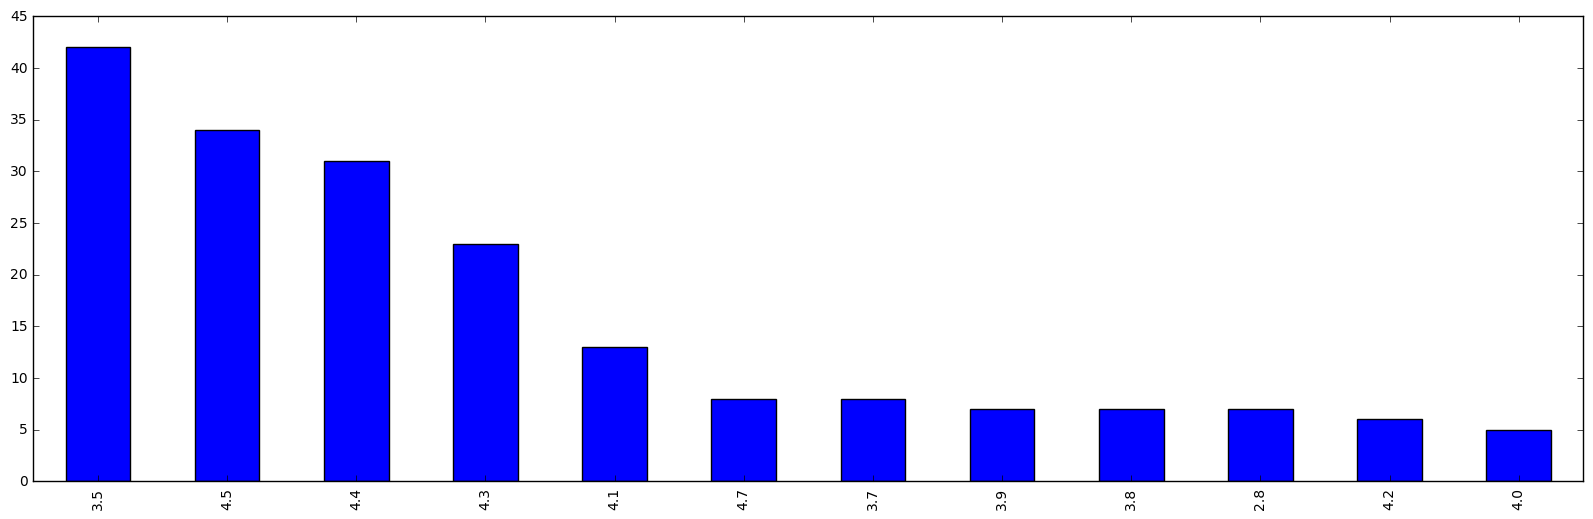

In [16]:
closedHotels['HotelRating'].value_counts().plot.bar(figsize = (20,20))
plt.show()

,HotelRating,Hoteladdress,Hotelcity,Hotelname,Hotelpostalcode,Hotelprice,Hotelprice_Discount,Hotelreviews,Hotelstate,key1,...,Hotelcity_x,Hotelname_x,Hotelpostalcode_x,Hotelstate_x,Hoteladdress_y,Hotelcity_y,Hotelname_y,Hotelpostalcode_y,Hotelstate_y,key2
0,4.5,3708 Las Vegas Blvd S,", Las Vegas",The Cosmopolitan Of Las Vegas,", 89109",NaN,170.0,4830.0,", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.5,3575 Las Vegas Blvd S,", Las Vegas",Hilton Grand Vacations at The Flamingo,", 89109",NaN,110.0,160.0,", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.5,4000 W Flamingo Rd,", Las Vegas",Gold Coast Hotel and Casino,", 89103",NaN,45.0,1166.0,", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.5,3555 Las Vegas Blvd S,", Las Vegas",Flamingo Las Vegas,", 89109",NaN,30.0,11083.0,", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.5,3645 Las Vegas Blvd S,", Las Vegas",Bally's Las Vegas,", 89109",NaN,30.0,8578.0,", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.5,3570 Las Vegas Blvd S,", Las Vegas",Anthology Suites and Villas at Caesars Palace,", 89109",NaN,240.0,8.0,", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.5,3570 Las Vegas Blvd S,", Las Vegas",Nobu Hotel,", 89109",NaN,149.0,224.0,", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.5,3570 Las Vegas Blvd S,", Las Vegas",Caesars Palace,", 89109",NaN,129.0,6299.0,", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,4.5,3535 Las Vegas Blvd S Suite 1,", Las Vegas",The LINQ Hotel & Casino,", 89109",NaN,39.0,5194.0,", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,4.5,3655 Las Vegas Blvd S,", Las Vegas",Paris Las Vegas,", 89109",NaN,64.0,8766.0,", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
i = 0
for stuff in closedHotels.Hotelname:
    if('Casino') in stuff:
        print(stuff)
        print()
        i += 1
print(i)

Gold Coast Hotel and Casino

The LINQ Hotel & Casino

Harrah's Hotel and Casino Las Vegas

Planet Hollywood Resort & Casino

The Westin Las Vegas Hotel, Casino & Spa

Best Western Plus Casino Royale

The Venetian Resort Hotel & Casino

Super 8 Las Vegas Strip Area at Ellis Island Casino

The Palazzo Resort Hotel & Casino

Rio All-Suite Hotel & Casino

Silver Sevens Hotel & Casino

Hard Rock Hotel & Casino

Westgate Las Vegas Resort & Casino

Palace Station Hotel and Casino

El Cortez Hotel and Casino

Golden Gate Hotel and Casino

Plaza Hotel and Casino - Las Vegas

Fremont Hotel & Casino

California Hotel and Casino

Main Street Station Hotel, Casino and Brewery

Silverton Casino Hotel

Arizona Charlie's Boulder - Casino Hotel, Suites, & RV Park

Longhorn Casino & Hotel

Eastside Cannery Casino & Hotel

South Point Hotel, Casino, and Spa

Suncoast Hotel and Casino

Lucky Club Casino and Hotel

Sunset Station Hotel & Casino

Cannery Hotel & Casino

The M Resort Spa Casino

Aliante Casi

In [1]:
i = 0
for stuff in closedHotels.Hotelname:
    if('Convention') in stuff:
        print(stuff)
        print()
        i += 1
print(i)

NameError: name 'NoDupsData' is not defined

In [3]:
closedHotels[['Hotelname','HotelRating']]

NameError: name 'closedHotels' is not defined

In [4]:
closedHotels[['Hotelreviews','HotelRating']]

NameError: name 'closedHotels' is not defined

In [ ]:
closedHotels[['HotelRating','Hotelprice_Discount','Hotelprice']]